In [5]:
# UNAD
# Oscar Andres Rodriguez Roddriguez

# Predicción de enfermedad cardiaca con Regresión Logística

#Pasos de la Actividad

#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
#5. Entrenar el modelo configurando los diferentes hiperparámetros
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
#8. Interpretar, analizar y documentar los resultados obtenidos
#9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

In [13]:
pip install numpy pandas seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
misDatos = pd.read_csv('C:/Users/edwpr/Downloads/heart_cleveland_upload.csv')


In [17]:
# Realizamos lectura de los Datos para el análisis exploratorio

misDatos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [18]:
# Descripción de los datos
misDatos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

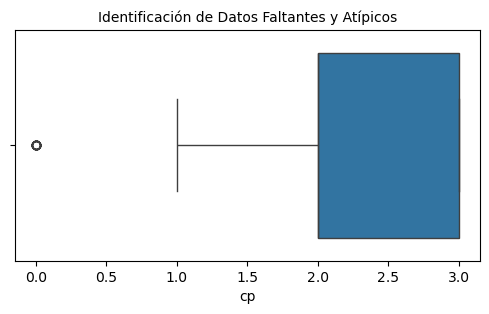

In [19]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=misDatos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

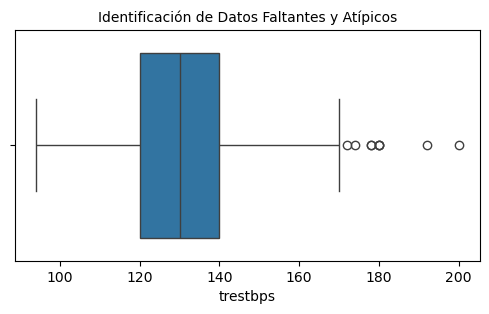

In [20]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=misDatos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

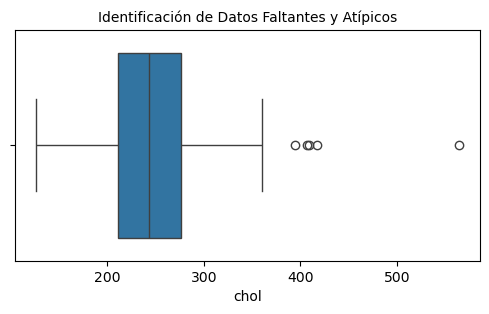

In [22]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=misDatos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

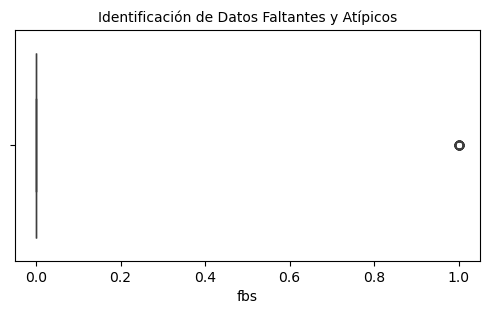

In [24]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=misDatos['fbs'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

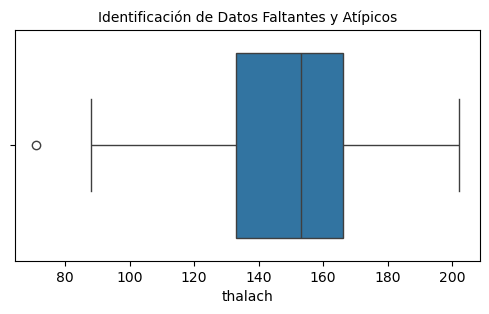

In [25]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=misDatos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

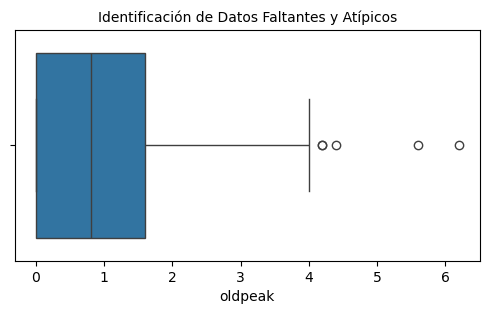

In [26]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=misDatos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

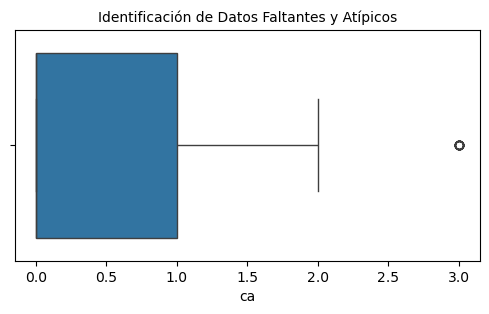

In [27]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=misDatos['ca'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

In [29]:
#Revisión del tipo de datos y datos faltantes

misDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


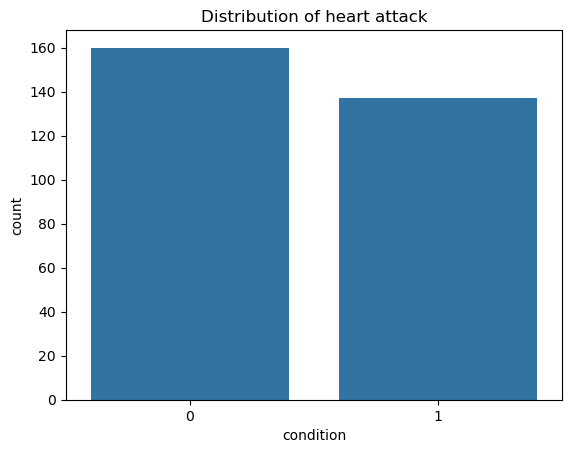

In [30]:
sns.countplot(data=misDatos, x="condition")
plt.title("Distribution of heart attack")
plt.show()

In [31]:
X = misDatos.drop("condition", axis=1)
Y = misDatos["condition"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [ ]:
print (X_train)

In [33]:
print (Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


### 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [35]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [36]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [37]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [38]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

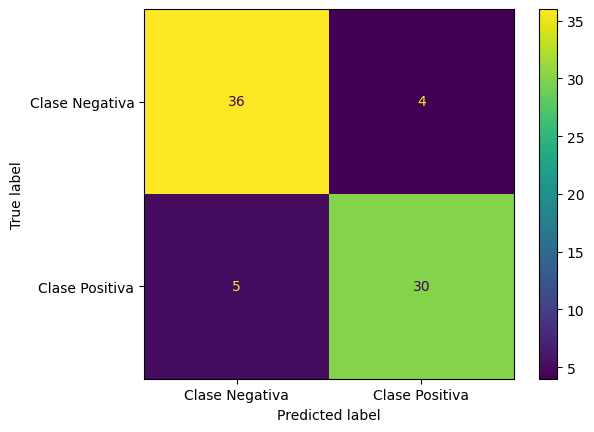

In [39]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
labels = ['Clase Negativa', 'Clase Positiva']
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

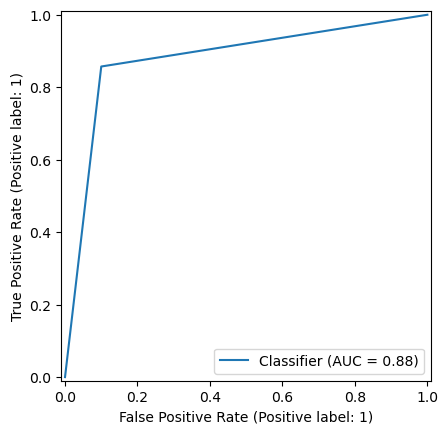

In [41]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

In [ ]:
8. Interpretar, analizar y documentar los resultados obtenidos


Del desempeño del modelo se puede describir:

- Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas 
    realizadas por el modelo. Aquí la precisión para la clase "condition" es 0,80, lo que significa que el 80% 
    de los predichos pueden tener ataques al corazón.

- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en 
    el conjunto de datos. Aquí el Recall para la clase "condition" es 0,86, lo que indica que el modelo identificó 
    correctamente al 86% de todos los diabéticos.
    
- F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra 
    la Precisión y Recall. Aquí la puntuación F1 para la clase "condition" es 0,87, lo que indica un equilibrio 
    entre precisión y recuerdo.

    

De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 36

- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 30

- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 4

- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 5
    

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,88 lo que significa que el 8 % de las predicciones del clasificador son correctas en todos los umbrales 
de clasificación.